<a href="https://colab.research.google.com/github/Ritikaa5/EDA-Exploratory-Data-Analysis-/blob/main/customerChurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import files
uploaded = files.upload()

Saving Customer Churn.csv.xlsx to Customer Churn.csv.xlsx


In [8]:
from os import read
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('Customer Churn.csv.xlsx')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


##Inspection of Data


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


 Replace blank with 0 as tenure is 0 andno total charge are recoded

In [10]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
df.isnull().sum().sum()

np.int64(0)

In [13]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [14]:
df["customerID"].duplicated().sum()

np.int64(0)

Convert 0 and 1 value of senior citizen to yes/no

In [15]:
def conv(value):
  if value == 1:
     return "yes"
  else:
     return "no"

df['SeniorCitizen']  = df['SeniorCitizen'].apply(conv)

In [17]:
df.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,no,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,no,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,no,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,no,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,no,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


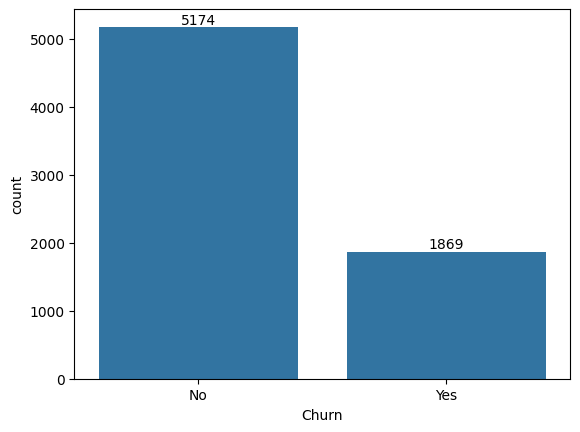

In [24]:
ax = sns.countplot(x = 'Churn' ,  data = df)

ax.bar_label(ax.containers[0])
plt.show()

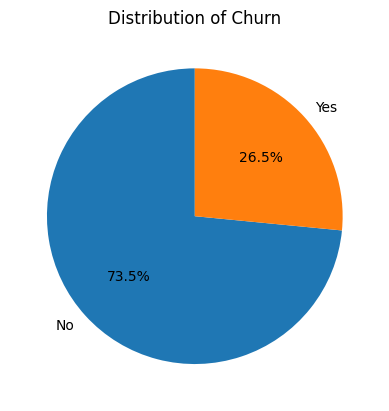

In [27]:
churn_counts = df['Churn'].value_counts()
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Churn')
plt.show()

from the given pie chart we can conclude that 26.5% customer have churned out, now explore the reason behind it.

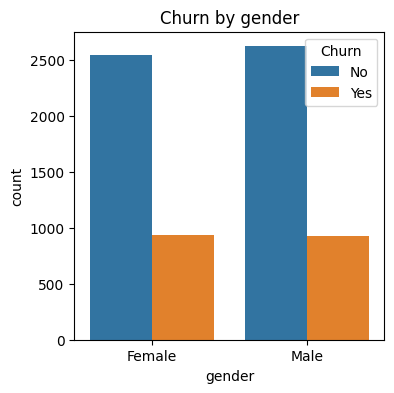

In [36]:
plt.figure(figsize=(4,4))
sns.countplot(x = "gender", data = df, hue = "Churn")
plt.title("Churn by gender")
plt.show()

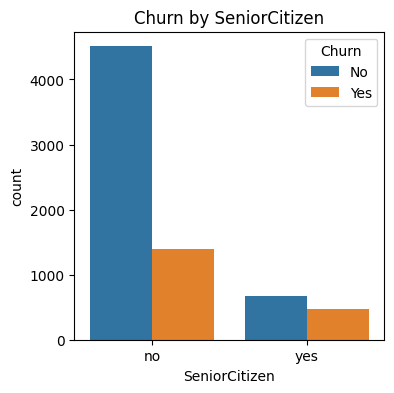

In [39]:
plt.figure(figsize=(4,4))
sns.countplot(x = "SeniorCitizen", data = df, hue = "Churn")
plt.title("Churn by SeniorCitizen")
plt.show()

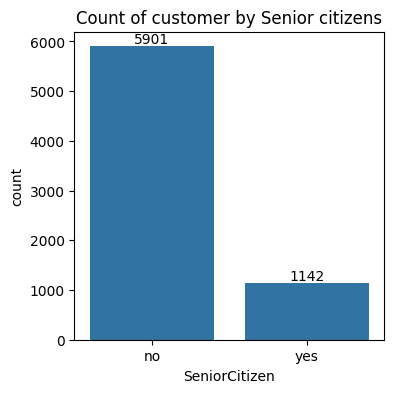

In [43]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x = "SeniorCitizen", data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of customer by Senior citizens")
plt.show()

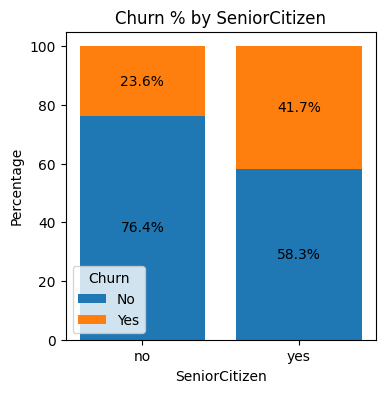

In [44]:
# 1. Create a frequency table
ct = pd.crosstab(df['SeniorCitizen'], df['Churn'])

# 2. Convert counts → percentages (row-wise)
ct_percent = ct.div(ct.sum(axis=1), axis=0) * 100

# 3. Plot stacked bar chart
plt.figure(figsize=(4,4))

# bottom layer (Churn = No)
plt.bar(ct_percent.index, ct_percent['No'], label='No')

# top layer (Churn = Yes)
plt.bar(ct_percent.index, ct_percent['Yes'],
        bottom=ct_percent['No'], label='Yes')

plt.title("Churn % by SeniorCitizen")
plt.xlabel("SeniorCitizen")
plt.ylabel("Percentage")

# Show % labels on bars
for i in ct_percent.index:
    # Label for "No"
    plt.text(i, ct_percent['No'][i] / 2,
             f"{ct_percent['No'][i]:.1f}%", ha='center', va='center')

    # Label for "Yes"
    plt.text(i, ct_percent['No'][i] + ct_percent['Yes'][i] / 2,
             f"{ct_percent['Yes'][i]:.1f}%", ha='center', va='center')

plt.legend(title="Churn")
plt.show()

Comparative a greated % of people in senior citizen category have churned

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

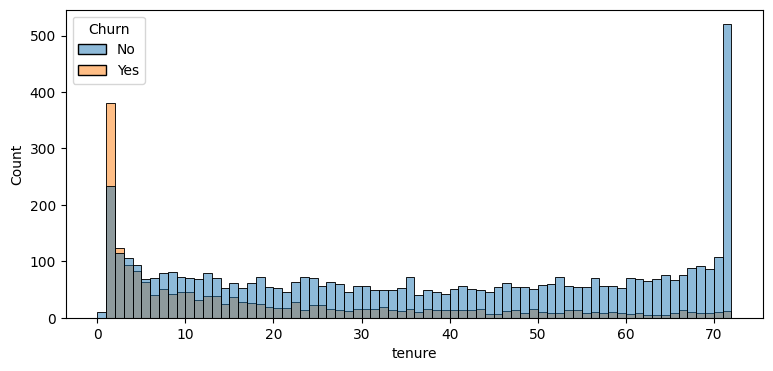

In [49]:
plt.figure(figsize=(9,4))
sns.histplot(data = df, x = "tenure", hue = "Churn", bins = 72)
plt

People who have used our sevices for long time have stayed and people who have used our services # 1 or 2 month have churned.

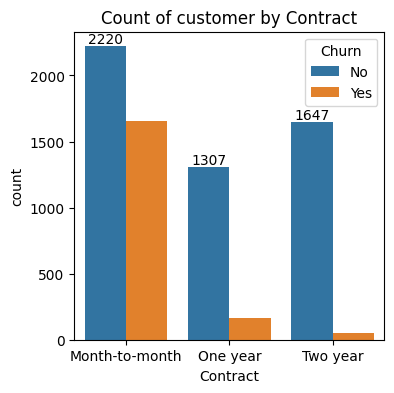

In [51]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x = "Contract", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of customer by Contract")
plt.show()

People who have month to month contract are likely to churn then from those who have 1 or 2 year of contract.

In [53]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

Categorical columns used: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


/tmp/ipython-input-967266158.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="Set2")
/tmp/ipython-input-967266158.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="Set2")
/tmp/ipython-input-967266158.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="Set2")
/tmp/ipython-input-967266158.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effe

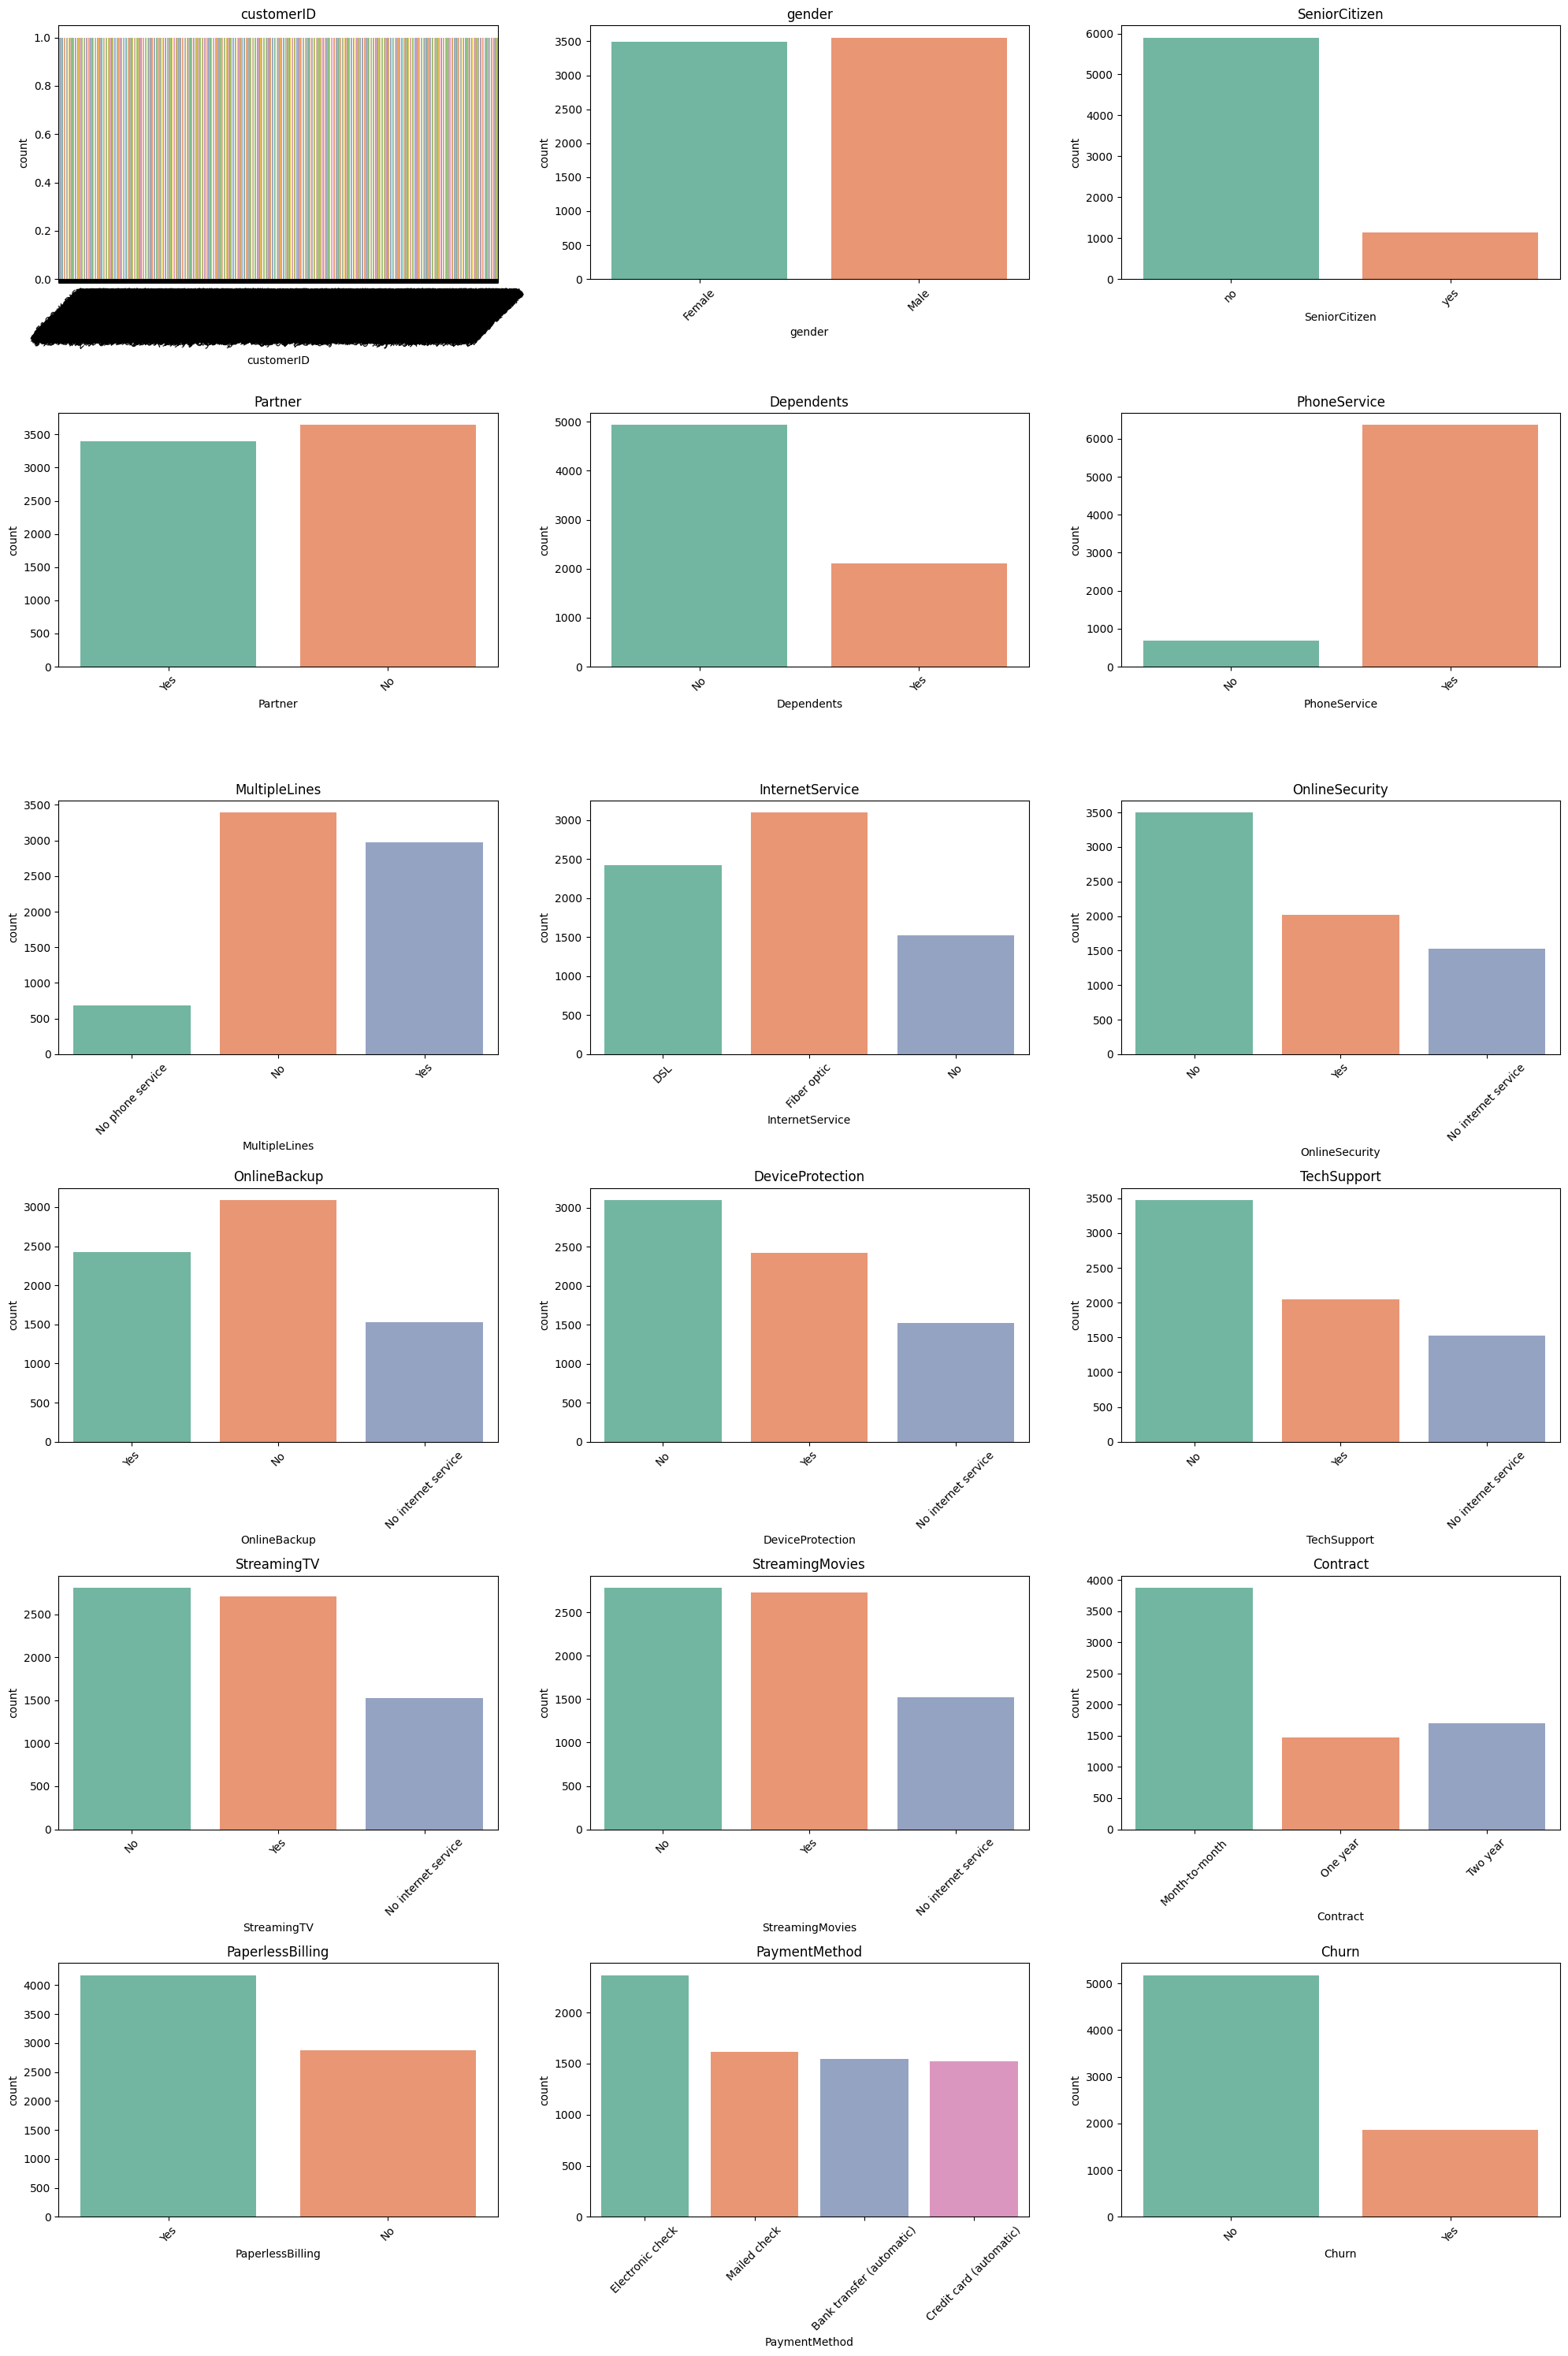

In [61]:
# All columns you provided
cols = ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn']

# Step 1: Select categorical columns only
cat_cols = []

for col in cols:
    if df[col].dtype == 'object' or df[col].nunique() < 15:
        cat_cols.append(col)

# Remove numerical columns that are not categorical
remove_numeric = ['tenure', 'MonthlyCharges', 'TotalCharges']
cat_cols = [c for c in cat_cols if c not in remove_numeric]

print("Categorical columns used:", cat_cols)

# Step 2: Create subplots
n_cols = 3
n_rows = (len(cat_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(20, n_rows * 5))

# Step 3: Loop through categorical columns
for i, col in enumerate(cat_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(x=df[col], palette="Set2")
    plt.title(col)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Most customers are male and female in almost equal proportion, with the majority not being Senior Citizens. A large portion of customers have partners and no dependents, and most use Fiber Optic or DSL internet, though many lack additional services like OnlineSecurity or TechSupport. Month-to-month contracts, paperless billing, and electronic payment methods dominate, which aligns with the higher churn visible in these categories.

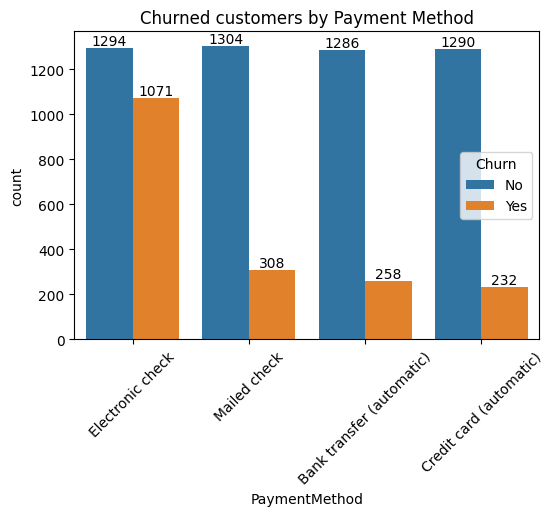

In [65]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x = "PaymentMethod", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned customers by Payment Method")
plt.xticks(rotation = 45)
plt.show()

Customer is likely to churn when he is using electronic check as a payment method.